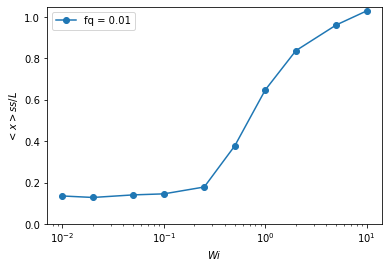

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit

"""
User Inputs
"""
N = 100
Ncharges = np.array([1])
lambda_d = 10.0
barrier = 3
barrier2 = 3
edot = np.array([1e-2,2e-2,5e-2,1e-1,2.5e-1,5e-1,1,2,5,10])
#edot = np.array([2e-3,2e-2,2e-1,2])
it = 1


xSS = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
xSSer = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
Wi = np.zeros(len(edot))

for n in range(0,len(Ncharges)):
    extlist = []
    strlist = []
    timelist = []
    for d in edot:

            
        file_name = "ens/E" + str(N)+ "_" + str(Ncharges[n])+ "_" + format(lambda_d,'.4f') + "_" +format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(d,'.5f') + "_" +str(1) + "_" +str(it)+".txt"


        """
        Extracting data
        """

        my_data = np.loadtxt(file_name,skiprows=1)
        time = my_data[:,0]
        ext = my_data[:,2]

        extlist.append(ext)
        #strlist.append(strain)
        timelist.append(time)

#         plt.plot(time,ext,label = Ncharges[n])
#         plt.legend()



    for i in range(0,len(edot)):

        cutoff = 1e7

        icut = np.where(timelist[i] > cutoff)[0][0]

        samples = len(time[icut:,])

        Nsamp = 2
        ###################
        cut = samples
        lensamp = int(cut/Nsamp)
        xSSsamp = np.zeros(Nsamp)
        Wi[i] = edot[i]
        extt = np.zeros(samples)
        for j in range(0,Nsamp):   
            #print(extlist[i][j*lensamp:(j+1)*lensamp])
            extt = extlist[i][icut:]
            xSSsamp[j] = np.mean(extt[j*lensamp:(j+1)*lensamp])

        xSS[n][i] = np.mean(xSSsamp)
        xSSer[n][i] = np.std(xSSsamp)/np.sqrt(Nsamp)

    
"""
Plot your data 
"""
for i in range(0,len(Ncharges)):
    plt.semilogx(Wi,xSS[i],"-o",label = "fq = %g" %(Ncharges[i]/N) )
    plt.legend()
    plt.ylim(0.0,1.05)
    plt.ylabel('$<x>ss/L$')
    plt.xlabel('$Wi$')


In [23]:
import csv
y = ["Wi","fq=0.0","STD_Err"]
with open('ext_chrg_it'+str(it)+".csv",mode='w') as practice_file:
    practice = csv.writer(practice_file,delimiter=',')
    practice.writerow(y)
    for i in range(0,len(xSS[0])):
        x = [Wi[i], xSS[0][i],xSSer[0][i]]
        practice.writerow(x)

In [20]:
import csv
y = ["Wi","fq=0.0","STD_Err","fq=0.25","STD_Err","fq=0.75","STD_Err"]
with open('ext_chrg_it'+str(it)+".csv",mode='w') as practice_file:
    practice = csv.writer(practice_file,delimiter=',')
    practice.writerow(y)
    for i in range(0,len(xSS[0])):
        x = [Wi[i], xSS[0][i],xSSer[0][i],xSS[1][i],xSSer[1][i],xSS[2][i],xSSer[2][i]]
        practice.writerow(x)

In [29]:
x

In [35]:
len(timelist[0])

20728

In [39]:
time

array([0.0000e+00, 1.0000e+03, 2.0000e+03, ..., 3.4997e+07, 3.4998e+07,
       3.4999e+07])